In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import adaptedplot_solution_1, adaptedplot_solution_2

In this workspace, you will work with the fuel economy dataset from the previous lesson on bivariate plots.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head().T

,0,1,2,3,4
id,32204,32205,32206,32207,32208
make,Nissan,Volkswagen,Volkswagen,Volkswagen,Chevrolet
model,GT-R,CC,CC,CC 4motion,Malibu eAssist
year,2013,2013,2013,2013,2013
VClass,Subcompact Cars,Compact Cars,Compact Cars,Compact Cars,Midsize Cars
drive,All-Wheel Drive,Front-Wheel Drive,Front-Wheel Drive,All-Wheel Drive,Front-Wheel Drive
trans,Automatic (AM6),Automatic (AM-S6),Automatic (S6),Automatic (S6),Automatic (S6)
fuelType,Premium Gasoline,Premium Gasoline,Premium Gasoline,Premium Gasoline,Regular Gasoline
cylinders,6,4,6,6,4
displ,3.8,2,3.6,3.6,2.4


**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [3]:
# YOUR CODE HERE

In [4]:
fuel_econ[ ["city","highway","VClass"] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
city       3929 non-null float64
highway    3929 non-null float64
VClass     3929 non-null object
dtypes: float64(2), object(1)
memory usage: 92.2+ KB


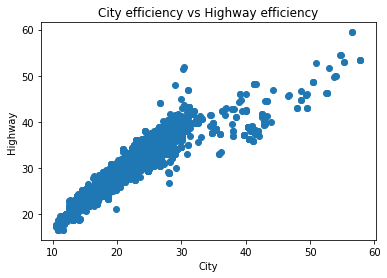

In [5]:
# First plot (to have a general idea of the global distribution)
plt.scatter(data=fuel_econ,x="city",y="highway")

plt.xlabel("City")
plt.ylabel("Highway")
plt.title("City efficiency vs Highway efficiency");

In [6]:
# Changing the type of VClass from string to categorical, while ordering to my convenience

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

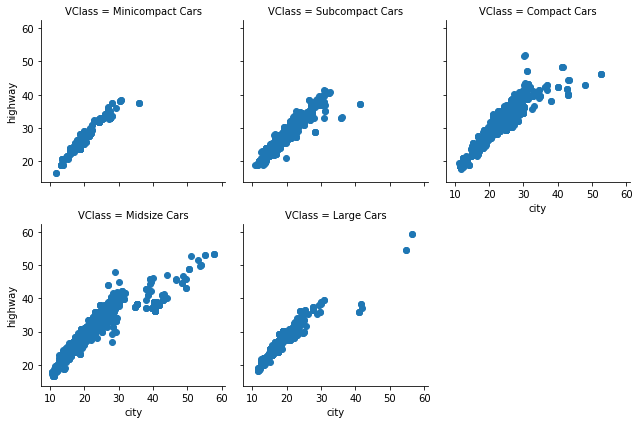

In [7]:
g = sb.FacetGrid(data=fuel_econ, col="VClass", col_wrap=3)
g.map(plt.scatter, "city","highway")

I will update the transparency in order to allow for a better observation for where we have high concentration of data.

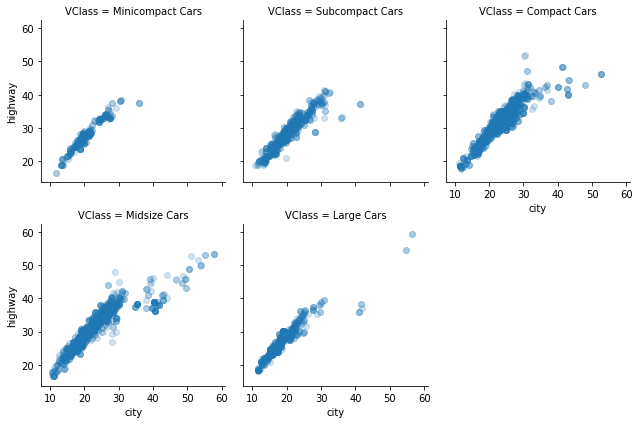

In [8]:
g = sb.FacetGrid(data=fuel_econ, col="VClass", col_wrap=3)
g.map(plt.scatter, "city","highway", alpha=1/5);

# plt.xlabel("City")
# plt.ylabel("Highway")
# plt.title("City efficiency vs Highway efficiency");

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.


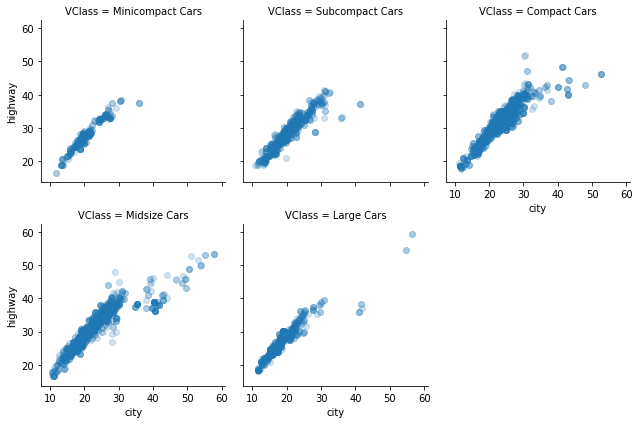

In [9]:
# run this cell to check your work against ours
adaptedplot_solution_1()

**Task 2**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [10]:
# YOUR CODE HERE

In [11]:
fuel_econ[ ["displ","VClass","fuelType"] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
displ       3929 non-null float64
VClass      3929 non-null category
fuelType    3929 non-null object
dtypes: category(1), float64(1), object(1)
memory usage: 65.5+ KB


In [12]:
fuel_econ["fuelType"].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

In [13]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
fuel_econ_sub['fuelType'].unique()

array(['Premium Gasoline', 'Regular Gasoline'], dtype=object)

In [14]:
# Changing the type of VClass from string to categorical, while ordering to my convenience

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ_sub['VClass'] = fuel_econ_sub['VClass'].astype(vclasses)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


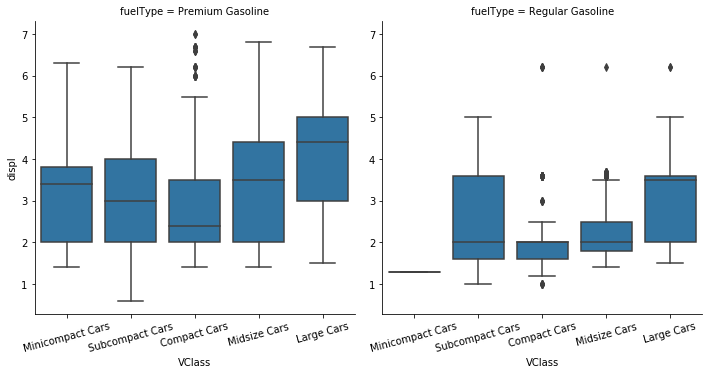

In [15]:
g = sb.FacetGrid(data=fuel_econ_sub, col="fuelType",size=5)
g.map(sb.boxplot, "VClass","displ" )

#plt.xticks(rotation = 15)
# Rotate xlabel in all subplot
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=15)

Since it is a box plot, it will be a good idea to have them plotted side by side on the same graph.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

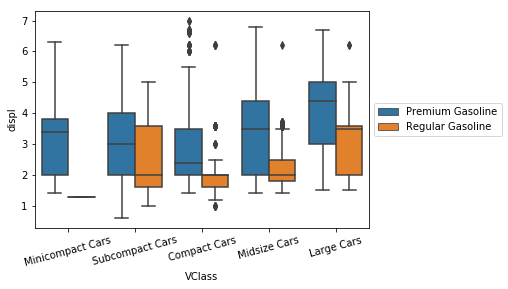

In [16]:
# Another way to resolve the exercise
sb.boxplot(data=fuel_econ_sub, x="VClass", y="displ",hue="fuelType")

plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.


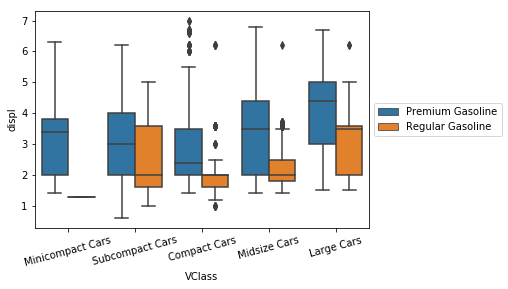

In [17]:
# run this cell to check your work against ours
adaptedplot_solution_2()